# Introduction 

There is a lot of hype about data analysts in the media today, and rightfully so. Many companies are looking to recruit people who can analyse large quantities of data. Over the past years, the data that these companies have managed to collect has grown very quickly. Hidden deep in these vast amounts of data are insights that can help managers make better decisions. As such, companies
are turning to data analysts/data scientists to help then uncover these insights. 

Data analysts/data scientists need two skills. First, they need to write code. This does not mean that they need to be programmers. A common mistake is thinking that data analysts need to come from a computer science background. This is not true. Today, there are many libraries and packages that make the job of the analyst much easier when it comes to writing code. 

Another skill that data analysts need is statistics. Unfortunately, it has been my experience that many data analysts do not have a good background in statistics. To them, data analysis is just about plotting graphs and training models. The result is that the work done by these analysts does not make much sense. The only way to understand which tool to use is to have a good grasp of these tools. This requires an understanding of statistics. Fortunately, you do not need to be a mathematician to understand statistics, at least not at the level required of a data analyst. Just like the coding part, this course will introduce the students to the various statistical concepts as we move along. In other words, as the course progresses, we will be talking about coding and statistics at the same time while introducing new concepts when they are needed.

The goal of this course is to provide the begining students with the necessary foundation that will allow them to start analysing data on their own using python. This course assumes no previous knowledge of python, statistics, or data structures. This course will not make you an expert. No single course can take you from A to Z, although many courses claim to do that. Instead, if you
are thinking about pursuing a career as a data analyst, then this course is a good place to start. Concepts will be explained in a simple way by relying on examples. Concepts will be introduced on a need to know basis. There is no separate chapter about python. There is no separate chapter about statistics. Instead, the student will learn both at the same time. The further you go in this
course, the more you will learn about python and statistics.

# Jupyter notebooks

Jupyter notebooks are one of the tools that are used by data scientists to write and test code. These notebooks are made up of cells. There are two types of cells: code and markdown. In a code cell, the user writes and executes Python code. In a markdown cell, the user writes regular text. What you are currently looking at is a notebook. This cell that you are reading now is a markdown cell. The following cell is a code cell:

In [1]:
print(1)

1


Notice that next to the markdown cell there is a small "play" icon. This button is used to run or execute the cell. You can also run the code by clikcing control+enter when the cursor is in the cell.

We will not go into the details of Jupyter notebooks now. Not because it i snot important, but because this is not the time. For now, what you need to know is how to enter code into a code cell and how to enter text into a markdown cell. Once you can do this, you will be able to follow along with the examples. You will also be able to start writing your own code.

# Some examples

Let us now look at some examples in order to understand.

## Datasets

As we mentioned in class, a dataset is a collection of information. Let us take a look at a sample dataset. Remember, you do not need to understand what these commands are. Do not focus on the commands. Focus on the output for now.

In [9]:
import pandas as pd

chicago_crime = pd.read_csv("https://data.cityofchicago.org/api/views/9hwr-2zxp/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

columns_to_keep = ['Case Number', 'Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Latitude', 'Longitude']

chicago_crime_filtered = chicago_crime.loc[:, columns_to_keep]

chicago_crime_filtered.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Latitude,Longitude
0,JF113025,01/14/2022 03:55:00 PM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,41.771782,-87.649437
1,JF124024,01/13/2022 04:00:00 PM,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,41.899206,-87.705506
2,JF346553,08/05/2022 09:00:00 PM,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,41.763338,-87.597001
3,JF373517,08/14/2022 02:00:00 PM,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,41.985875,-87.766404
4,JF469015,11/10/2022 03:47:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,41.762615,-87.652840


This is a dataset contains information about crime in Chicago. Take a look at the features that are in this dataset:
* Case number: The case number assigned to the case
* Date: The date the case was opened
* Primary Type: The type of crime
* Description: A description of the crime
* Location description: Type of location where the crime took place
* Arrest: Whether an arrest was made or not
* Latitude and longitude: Geographic location of the crime

Each row in the dataset is an instance. Each row represents a unique crime.

## Cleaning datasets

Dataset cleaning is an important step because it ensures that the dataset is ready to be analyzed. One of the steps taken during data cleaning is checking for missing values. Let us take a look at the missing values in our dataset:

In [10]:
chicago_crime_filtered.isnull().sum()

Case Number                0
Date                       0
Primary Type               0
Description                0
Location Description     954
Arrest                     0
Latitude                4592
Longitude               4592
dtype: int64

We can see that some fteaures, such as date do not have any missing values. On the other hand, we see that there are 954 instances where the location description is missing. The features with the largest number of missing values are latitude and longitude.

## Dataset exploration

One of the things data scientists do is explore datasets. The following command allows us to visualize the frequency of crime types:

<Axes: title={'center': 'Number of Crimes per Primary Type'}>

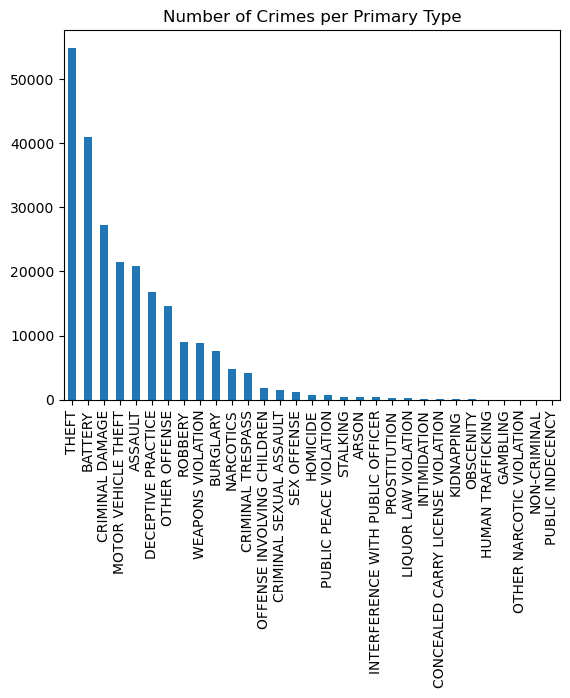

In [6]:
crime_counts = chicago_crime_filtered['Primary Type'].value_counts()

crime_counts.plot(kind='bar', title='Number of Crimes per Primary Type')


Notice that with only two lines of code we are able to produce a plot that allows us to explore the data. This graph shows us the frequency of each type of crime. We now know that in our dataset the most frequent crime is theft, followed by battery.

Let us produce another plot that will also allow us to better understand what the data is telling us:

<Axes: xlabel='Primary Type'>

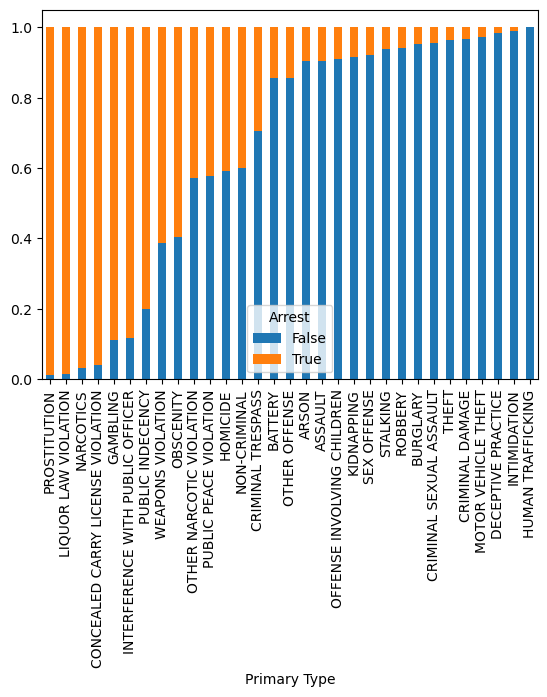

In [7]:
pd.crosstab(index=chicago_crime_filtered["Primary Type"],columns=chicago_crime_filtered["Arrest"], normalize="index").sort_values(by=False).plot(kind="bar", stacked=True)

This graph gives us another picture of crime in Chicago. Notice that all bars are the same height. This is because the heights of the bars 

## Modeling data

Data scientists build models that can help predict certain features. For example, in the Chicago crime dataset, it is possible to try to build a simple model that will help us predict whether a crime will result in an arrest based on geographic location (latitude and longitude):


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

chicago_crime_filtered_cleaned = chicago_crime_filtered.dropna()

X = chicago_crime_filtered_cleaned[['Latitude', 'Longitude']]
y = chicago_crime_filtered_cleaned['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.883475390241473


With only a few lines of code, we built a simple model that has an accuracy of 88%. While this might look like a good accuracy, it is not. However, this is a discussion for another time.

# Conclusion

The purpose of this notebook was to provide a simple explanation of what data scientists do. As mentioned before, you do not need to worry about the commands that are used. The commands are there to show you that with a few lines of code we can do quite a bit.